<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science - Regressão Linear</h1>

# <font color='red' style='font-size: 30px;'>Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## Importando bibliotecas

https://matplotlib.org/

https://pandas.pydata.org/

http://www.numpy.org/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


## Bibliotecas opcionais

https://docs.python.org/3/library/warnings.html

In [2]:
# para ignorar mensagens do colab sobre atualização de bibliotecas
import warnings

warnings.filterwarnings('ignore')

In [3]:
# link = r'G:\Meu Drive\Alura ciencia de dados\Datascience\Regressao_linear_testando_relacoes_prevendo_resultados\Dados\Consumo_cerveja.csv'

# df = pd.read_csv(link,sep = ';')
# df

In [4]:
from google.colab import drive
drive.mount('/content/drive')

link = '/content/drive/MyDrive/Alura ciencia de dados/Datascience/Regressao_linear_testando_relacoes_prevendo_resultados/Dados/Consumo_cerveja.csv'

df = pd.read_csv(link, sep =';')



Mounted at /content/drive


## O Dataset e o Projeto
<hr>

### Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde o happy hour até grandes festas de casamento.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O objetivo deste treinamento será estimar um modelo de <b>Machine Learning</b> utilizando a técnica de <b>Regressão Linear</b> para demonstrar os impactos das variáveis disponibilizadas neste dataset sobre o consumo de cerveja (Y). No final do projeto teremos um modelo de previsão para o consumo médio de cerveja segundo os inputs de um conjunto de variáveis (X's).</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>data</b> - Data</li>
    <li><b>temp_media</b> - Temperatura Média (°C)</li>
    <li><b>temp_min</b> - Temperatura Mínima (°C)</li>
    <li><b>temp_max</b> - Temperatura Máxima (°C)</li>
    <li><b>chuva</b> - Precipitação (mm)</li>
    <li><b>fds</b> - Final de Semana (1 = Sim; 0 = Não)</li>
    <li><b>consumo</b> - Consumo de Cerveja (litros)</li>
</ul>

## Leitura dos dados

In [5]:
# dados = pd.read_table('../Dados/Consumo_cerveja.csv', sep=';')

# A função read_table() oferece suporte para
# ler arquivos com o conteúdo separado por delimitadores.
# Em nosso exemplo do projeto, o código ficaria da seguinte forma:

## Visualizar os dados

In [6]:
df.shape

(365, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   data        365 non-null    object 
 1   temp_media  365 non-null    float64
 2   temp_min    365 non-null    float64
 3   temp_max    365 non-null    float64
 4   chuva       365 non-null    float64
 5   fds         365 non-null    int64  
 6   consumo     365 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 20.1+ KB


In [8]:
df.head(5)

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900


## Verificando o tamanho do dataset

In [9]:
df.shape

(365, 7)

# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [10]:
df.describe().round()

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.0,365.0,365.0,365.0,365.0,365.0
mean,21.0,17.0,27.0,5.0,0.0,25401.0
std,3.0,3.0,4.0,12.0,0.0,4399.0
min,13.0,11.0,14.0,0.0,0.0,14343.0
25%,19.0,15.0,24.0,0.0,0.0,22008.0
50%,21.0,18.0,27.0,0.0,0.0,24867.0
75%,23.0,20.0,29.0,3.0,1.0,28631.0
max,29.0,24.0,36.0,95.0,1.0,37937.0


## Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>


<p>O coeficiente de correlação é uma medida estatística que quantifica a relação entre duas variáveis. Existem diferentes tipos de coeficientes de correlação, sendo os mais comuns o coeficiente de correlação de Pearson e o coeficiente de correlação de Spearman. Vou explicar brevemente cada um deles:</p>

![imagem](https://static.significados.com.br/foto/equacao-correlacao-etapa-6.png)

Coeficiente de Correlação de Pearson:

Também conhecido como "correlação linear" ou "correlação de Pearson".
Mede a força e a direção da relação linear entre duas variáveis contínuas.
Varia entre -1 e 1, onde:
1 indica uma correlação positiva perfeita (quando uma variável aumenta, a outra também aumenta de forma linear).
-1 indica uma correlação negativa perfeita (quando uma variável aumenta, a outra diminui de forma linear).
0 indica ausência de correlação linear.
Calculado pela fórmula:

​

Coeficiente de Correlação de Spearman:

Também conhecido como "correlação de postos" ou "correlação de ordem".
Mede a relação monotônica entre duas variáveis, ou seja, se uma variável aumenta, a outra também aumenta ou diminui de forma consistente, mas não necessariamente de maneira linear.
Não assume uma relação linear entre as variáveis.
Calculado a partir dos postos (ordens) das observações, em vez dos próprios valores das observações.

In [11]:
df.corr().round(4)

,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.0000,0.8628,0.9225,0.0244,-0.0508,0.5746
temp_min,0.8628,1.0000,0.6729,0.0986,-0.0595,0.3925
temp_max,0.9225,0.6729,1.0000,-0.0493,-0.0403,0.6427
chuva,0.0244,0.0986,-0.0493,1.0000,0.0016,-0.1938
fds,-0.0508,-0.0595,-0.0403,0.0016,1.0000,0.5060
consumo,0.5746,0.3925,0.6427,-0.1938,0.5060,1.0000


<Axes: >

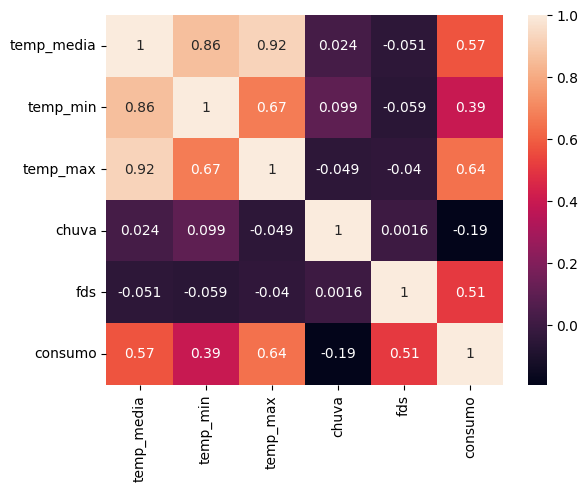

In [12]:
import seaborn as sns

sns.heatmap(df.corr().round(4), annot=True)

# <font color='red' style='font-size: 30px;'>Comportamento da Variável Dependente (Y)</font>
<hr style='border: 2px solid red;'>

# Análises gráficas

## Plotando a variável *dependente* (y)
https://pandas.pydata.org/pandas-docs/stable/visualization.html

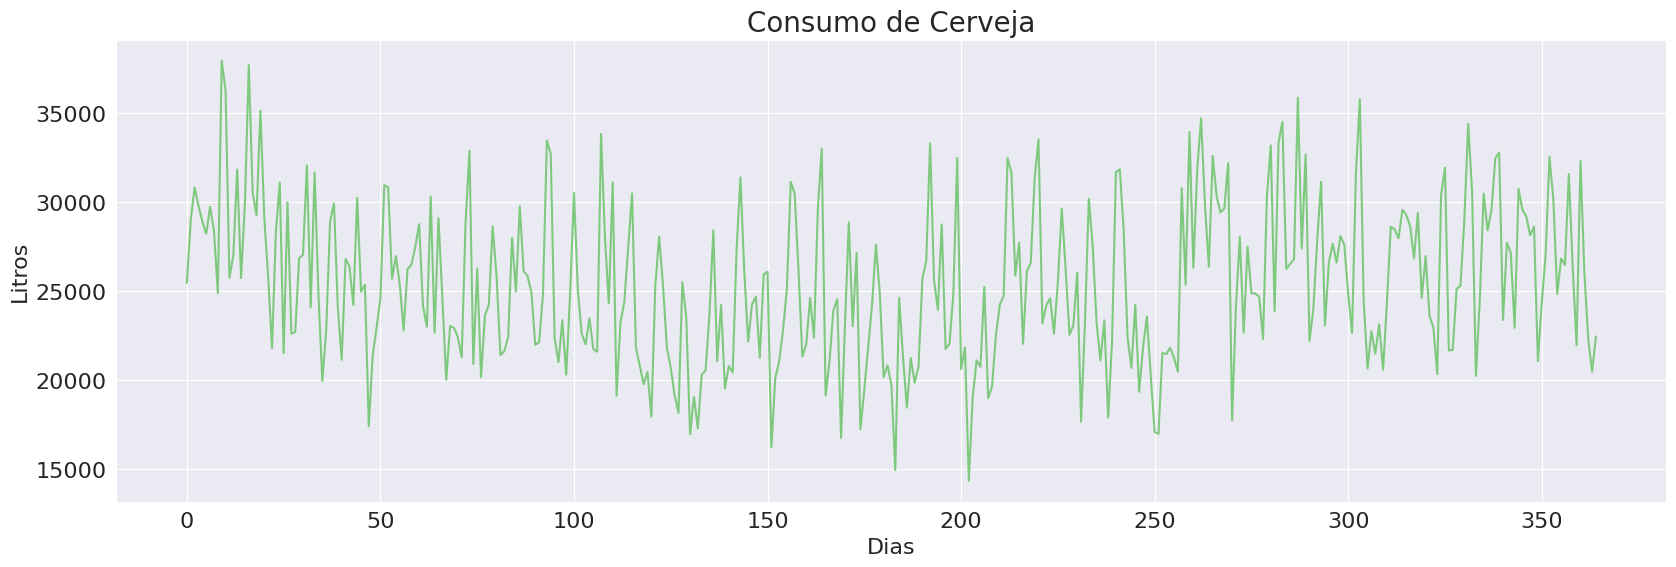

In [101]:
(28,11)
fig, ax = plt.subplots( figsize=(20,6))

ax.set_title('Consumo de Cerveja', fontsize = 20)
ax.set_ylabel('Litros',fontsize = 16)
ax.set_xlabel('Dias',fontsize =16)
ax = df['consumo'].plot(fontsize=16)

# <font color='red' style='font-size: 30px;'>Box Plot</font>
<hr style='border: 2px solid red;'>

<img width='700px' src='../Dados/img/Box-Plot.png'>


!['box plot'](https://blog.curso-r.com/images/posts/banner/outlier.webp)

!['outlier'](https://miro.medium.com/v2/resize:fit:1400/1*0MPDTLn8KoLApoFvI0P2vQ.png)

## Importando biblioteca seaborn
https://seaborn.pydata.org/
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O Seaborn é uma biblioteca Python de visualização de dados baseada no matplotlib. Ela fornece uma interface de alto nível para desenhar gráficos estatísticos.</p>

## Box plot da variável *dependente* (y)

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

Text(0, 0.5, 'Litros')

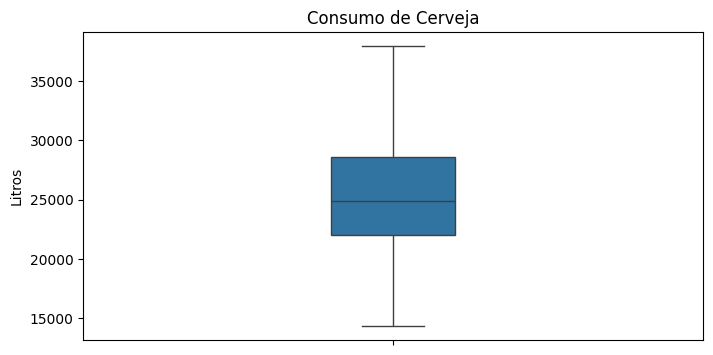

In [14]:
import seaborn as sns

ax = sns.boxplot(data = df, y = 'consumo', orient = 'v', width = 0.2)
ax.figure.set_size_inches(8,4)
ax.set_title('Consumo de Cerveja', fontsize = 12)
ax.set_ylabel('Litros',fontsize = 10)

<Axes: >

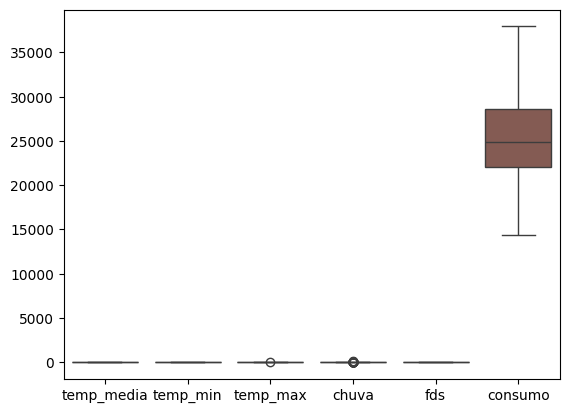

In [15]:
sns.boxplot(df)



<img src="https://www.abgconsultoria.com.br/blog/wp-content/uploads/boxplot-1-1024x664.png" alt="asd" width="700">






<img src="https://miro.medium.com/v2/resize:fit:609/1*r41SQj0LbdCV6rWoIos6mA.png" alt="asd" width="1000">

![assimetria](https://slideplayer.com.br/slide/1664893/6/images/24/Formato+%26+Box+Plot+Assim%C3%A9trica+%C3%A0+esquerda+Sim%C3%A9trica+Q+Mediana.jpg)

<img src="https://slideplayer.com.br/slide/1664893/6/images/24/Formato+%26+Box+Plot+Assim%C3%A9trica+%C3%A0+esquerda+Sim%C3%A9trica+Q+Mediana.jpg" alt="asd" width="700">

# <font color='red' style='font-size: 30px;'>Box Plot com Duas Variáveis</font>
<hr style='border: 2px solid red;'>

## Investigando a variável *dependente* (y) segundo determinada característica

Text(0, 0.5, 'Litros')

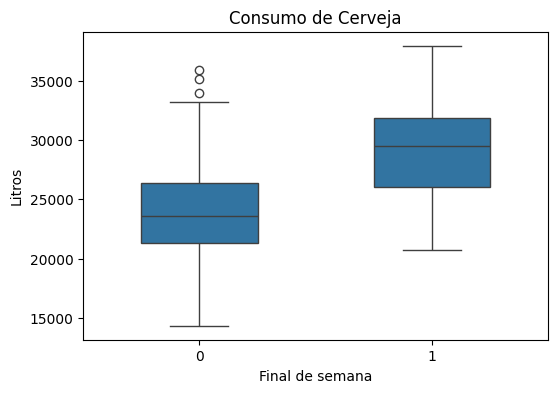

In [16]:
ax = sns.boxplot(data = df, y = 'consumo',x='fds', orient = 'v', width = 0.5)
ax.figure.set_size_inches(6,4)
ax.set_title('Consumo de Cerveja', fontsize = 12)
ax.set_xlabel('Final de semana',fontsize = 10)
ax.set_ylabel('Litros',fontsize = 10)

## Configurações de estilo e cor da biblioteca *seaborn*

### Controle de estilo

> ####  API
> https://seaborn.pydata.org/api.html#style-api

> #### Tutorial
> https://seaborn.pydata.org/tutorial/aesthetics.html#aesthetics-tutorial

### Paleta de cores

> #### API
> https://seaborn.pydata.org/api.html#palette-api

> #### Tutorial
> https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial

In [17]:
# palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r


#sns.set_palette("Accent")


In [18]:

# style -> white, dark, whitegrid, darkgrid, ticks

#sns.set_style("darkgrid")

Text(0, 0.5, 'Litros')

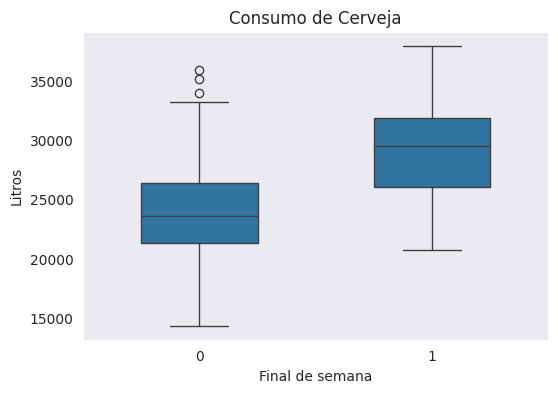

In [19]:


sns.set_palette("tab20")
sns.set_style("dark")

ax = sns.boxplot(data = df, y = 'consumo',x='fds', orient = 'v', width = 0.5)
ax.figure.set_size_inches(6,4)
ax.set_title('Consumo de Cerveja', fontsize = 12)
ax.set_xlabel('Final de semana',fontsize = 10)
ax.set_ylabel('Litros',fontsize = 10)



# <font color='red' style='font-size: 30px;'>Distribuição de Frequências</font>
<hr style='border: 2px solid red;'>

## Distribuição de frequências da variável *dependente* (y)

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

Text(0, 0.5, 'Consumo de Cerveja (Litros)')

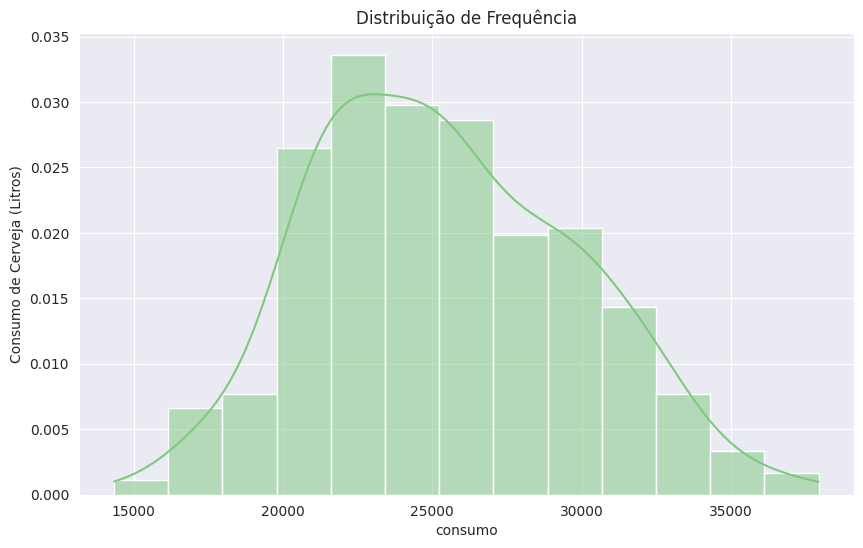

In [20]:
sns.set_palette("Accent")
sns.set_style("darkgrid")

ax = sns.histplot(df.consumo,kde= True,  stat="frequency")
ax.figure.set_size_inches(10,6)
ax.set_title('Distribuição de Frequência', fontsize = 12)
ax.set_ylabel('Consumo de Cerveja (Litros)',fontsize = 10)

# <font color='red' style='font-size: 30px;'>Variável Dependente X Variáveis Explicativas (pairplot)</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersão entre as variáveis do dataset

## seaborn.pairplot

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota o relacionamento entre pares de variáveis em um dataset.</p>

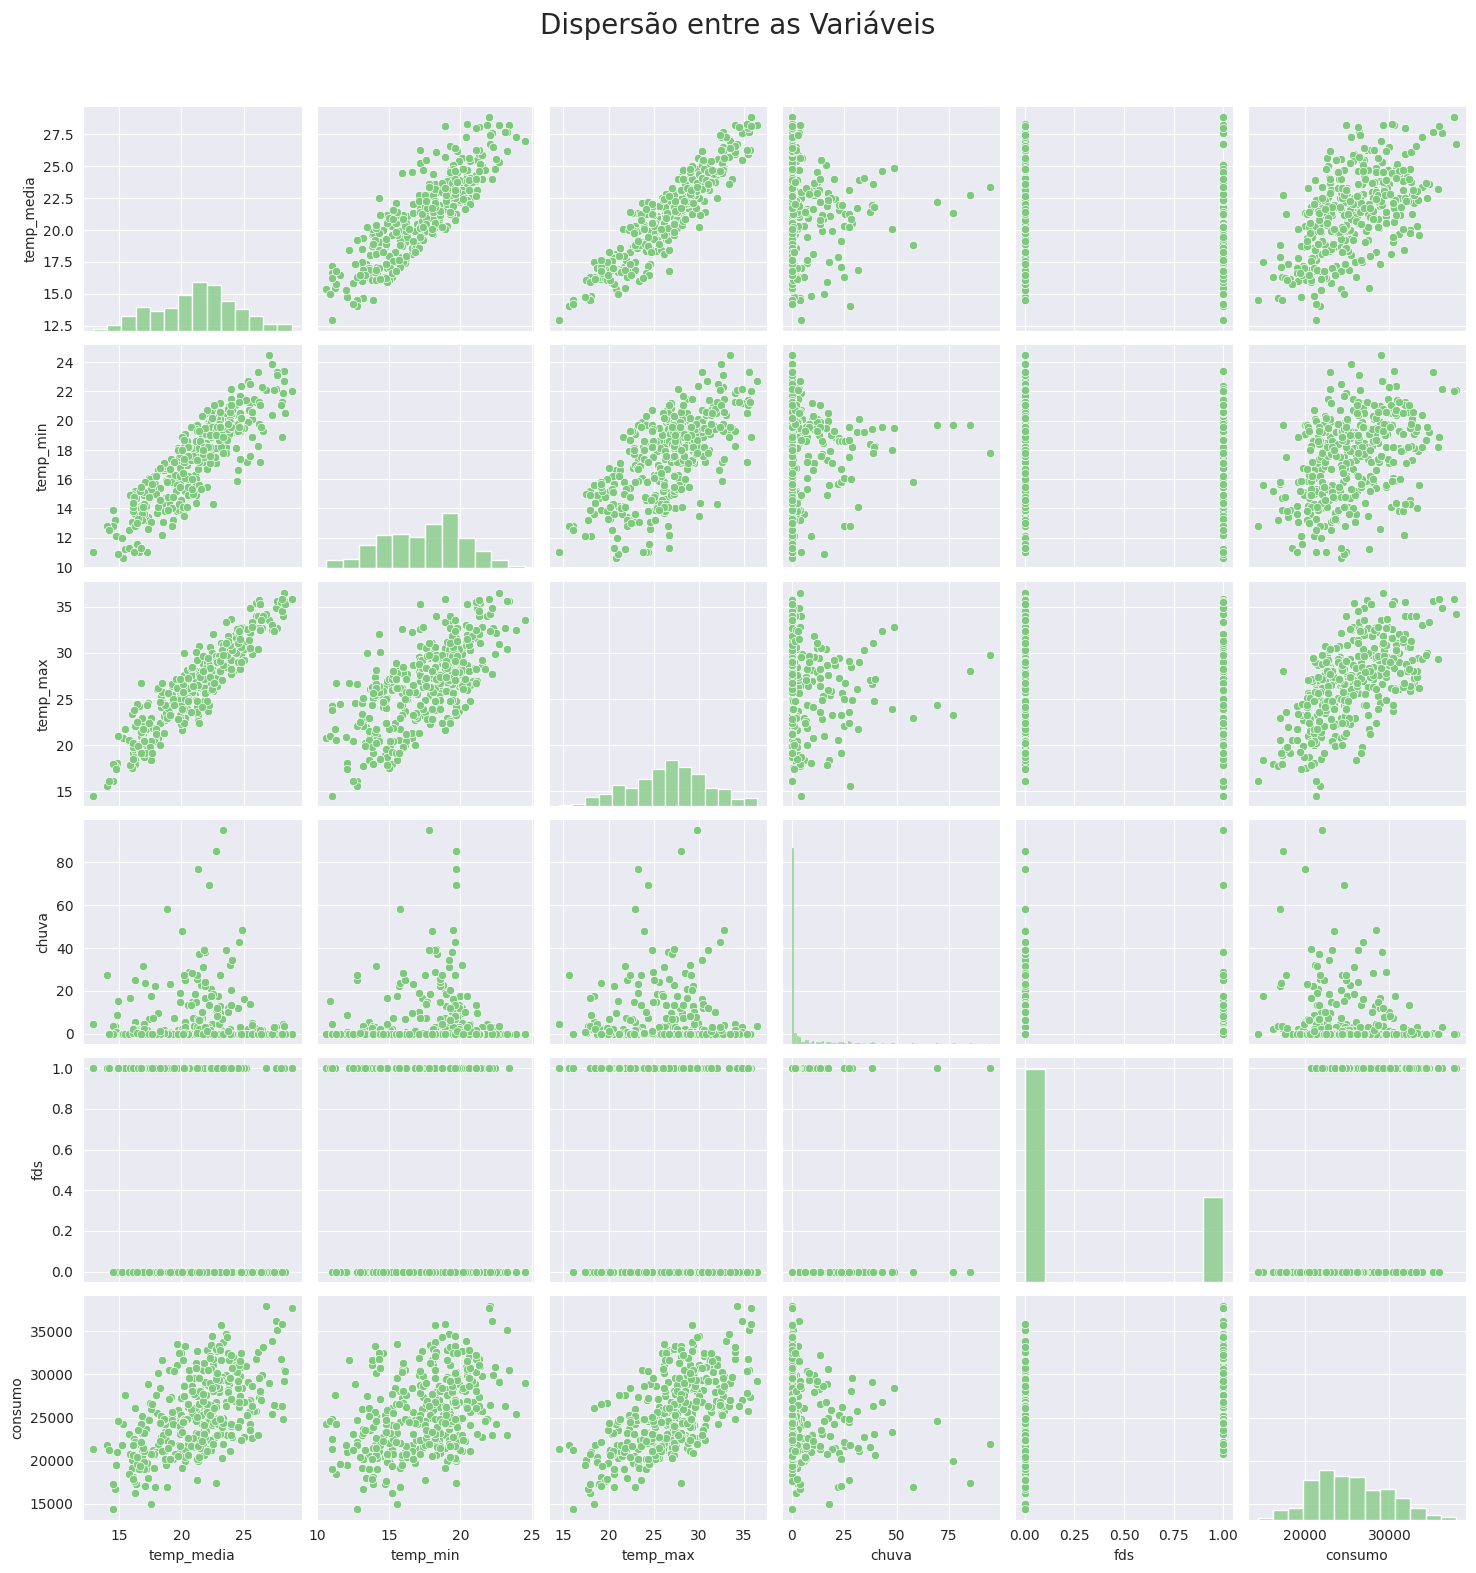

In [102]:
ax = sns.pairplot(df)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize = 20, y = 1.05)
ax

## Plotando o pairplot fixando somente uma variável no eixo y

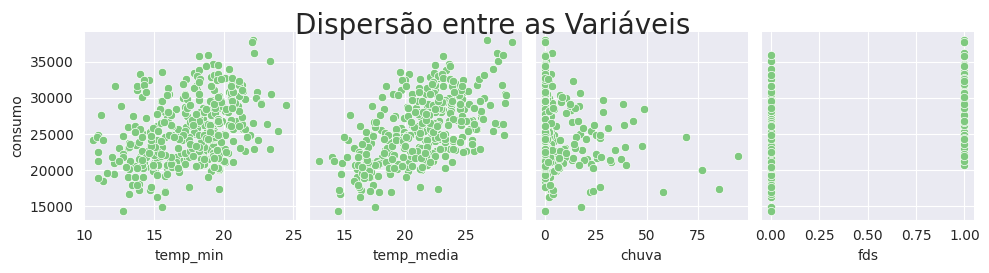

In [22]:
ax = sns.pairplot(df, y_vars = 'consumo', x_vars = ['temp_min','temp_media','chuva','fds'])
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize = 20, y = 1.05)
ax

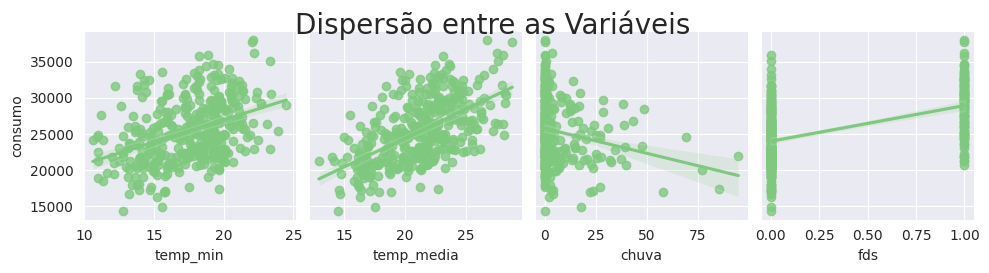

In [23]:
ax = sns.pairplot(df, y_vars = 'consumo', x_vars = ['temp_min','temp_media','chuva','fds'], kind='reg')
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize = 20, y = 1.05)
ax

# <font color='red' style='font-size: 30px;'>Variável Dependente X Variáveis Explicativas (jointplot)</font>
<hr style='border: 2px solid red;'>

## seaborn.jointplot

https://seaborn.pydata.org/generated/seaborn.jointplot.html?highlight=jointplot#seaborn.jointplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota o relacionamento entre duas variáveis e suas respectivas distribuições de frequência.</p>

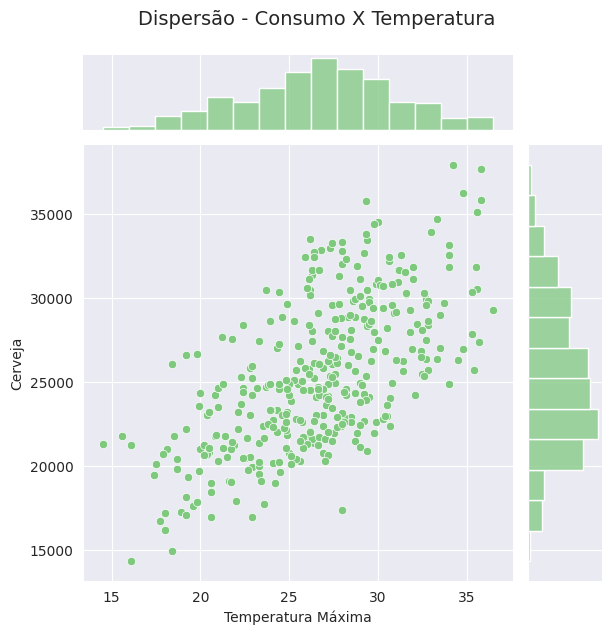

In [24]:
# gráfico de dispensão e frequencia
ax = sns.jointplot(x = 'temp_max',y = 'consumo', data = df)
ax.fig.suptitle('Dispersão - Consumo X Temperatura', fontsize = 14, y = 1.05)
ax.set_axis_labels('Temperatura Máxima','Cerveja',fontsize = 10)
ax

## Plotando um jointplot com a reta de regressão estimada

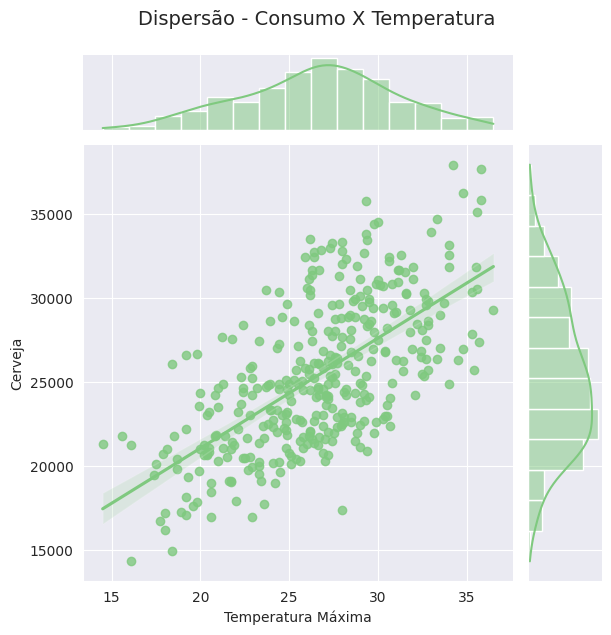

In [25]:
# gráfico de dispensão e frequencia
ax = sns.jointplot(x = 'temp_max',y = 'consumo', data = df, kind = 'reg')
ax.fig.suptitle('Dispersão - Consumo X Temperatura', fontsize = 14, y = 1.05)
ax.set_axis_labels('Temperatura Máxima','Cerveja',fontsize = 10)
ax

# <font color='red' style='font-size: 30px;'>Variável Dependente X Variáveis Explicativas (lmplot)</font>
<hr style='border: 2px solid red;'>

## seaborn.lmplot

https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota a reta de regressão entre duas variáveis juntamente com a dispersão entre elas.</p>

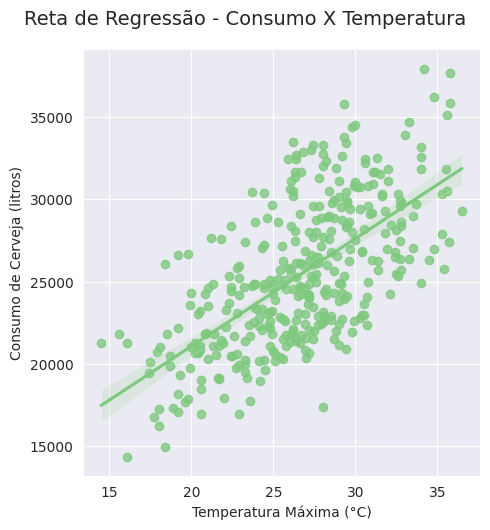

In [26]:
ax = sns.lmplot(data = df, x = 'temp_max', y = 'consumo')
ax.fig.suptitle('Reta de Regressão - Consumo X Temperatura', fontsize = 14, y = 1.05)
ax.set_xlabels('Temperatura Máxima (°C)',fontsize = 10)
ax.set_ylabels('Consumo de Cerveja (litros)',fontsize = 10)
ax

## Plotando um lmplot utilizando uma terceira variável na análise (tipo I)

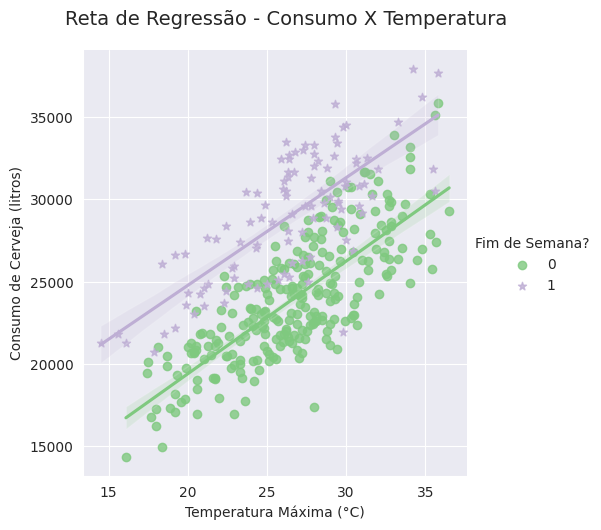

In [27]:
ax = sns.lmplot(data = df, x = 'temp_max', y = 'consumo', hue = 'fds', markers = ['o','*'], legend = False)
ax.fig.suptitle('Reta de Regressão - Consumo X Temperatura', fontsize = 14, y = 1.05)
ax.set_xlabels('Temperatura Máxima (°C)',fontsize = 10)
ax.set_ylabels('Consumo de Cerveja (litros)',fontsize = 10)
ax.add_legend(title ='Fim de Semana?')
ax

## Plotando um lmplot utilizando uma terceira variável na análise (tipo II)

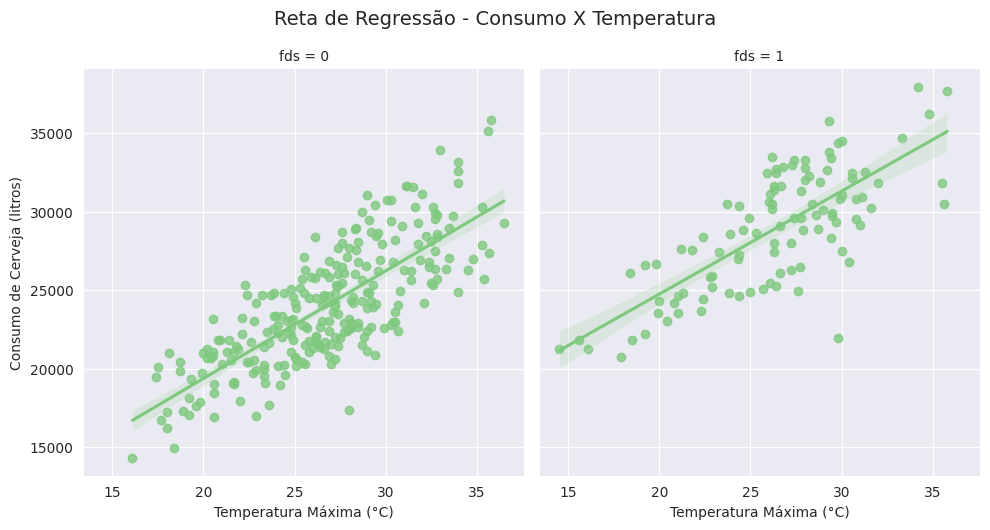

In [28]:
ax = sns.lmplot(data = df, x = 'temp_max', y = 'consumo', col = 'fds')
ax.fig.suptitle('Reta de Regressão - Consumo X Temperatura', fontsize = 14, y = 1.05)
ax.set_xlabels('Temperatura Máxima (°C)',fontsize = 10)
ax.set_ylabels('Consumo de Cerveja (litros)',fontsize = 10)
ax

# <font color='red' style='font-size: 30px;'>Estimando um Modelo de Regressão Linear para o Consumo</font>
<hr style='border: 2px solid red;'>

# Regresão Linear
<hr>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>A análise de regressão diz respeito ao estudo da dependência de uma variável (a variável <b>dependente</b>) em relação a uma ou mais variáveis, as variáveis explanatórias, visando estimar e/ou prever o valor médio da primeira em termos dos valores conhecidos ou fixados das segundas.</p>


## scikit-learn (https://scikit-learn.org/stable/)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O *scikit-learn* é um módulo Python especializado em soluções para *machine learning*.</p>



## Importando o *train_test_split* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [29]:
from sklearn.model_selection import train_test_split



## Criando uma Series (pandas) para armazenar o Consumo de Cerveja (y)

In [30]:
y = df.consumo

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [31]:
X = df[['temp_max', 'chuva', 'fds']]

## Criando os datasets de treino e de teste

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.3, random_state = 2811)

## Verificando os tamanhos dos arquivos gerados pela função *train_test_split*

In [33]:
X_train.shape

(255, 3)

In [34]:
X_test.shape

(110, 3)

In [35]:
X_train.shape[0] + X_test.shape[0]

365

In [36]:
X.shape[0] * 0.3

109.5

In [37]:
X.shape[0] * 0.7

255.49999999999997

<img width='600px' src='../Dados/img/reg_01.jpg'>


<img width='600px' src='https://qualityway.files.wordpress.com/2020/06/regresso-linear-i-21-638.jpg?w=638&h=450&crop=1'>

<img width='600px' src='https://www.alura.com.br/artigos/assets/desvendando-a-regressao-linear/imagem4.png'>

## Importando *LinearRegression* e *metrics* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [103]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Instanciando a classe *LinearRegression()*

In [68]:
modelo = LinearRegression()

## Utilizando o método *fit()* do objeto "modelo" para estimar nosso modelo linear utilizando os dados de TREINO (y_train e X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [69]:
modelo.fit(X_train,y_train)

LinearRegression()

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

In [71]:
# codigo do 2 -> alt 1021
print(f'R² = {modelo.score(X_train,y_train) * 100:.2f}%')

R² = 73.36%


## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()* do objeto "modelo"

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [72]:
y_previsto = modelo.predict(X_test)


## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [73]:
print(f'R² = {metrics.r2_score(y_test, y_previsto) * 100:.2f}%')

R² = 69.07%


# <font color='red' style='font-size: 30px;'>Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

## Dados de entrada

In [44]:
entrada = X_test[0:1]
entrada

,temp_max,chuva,fds
5,30.5,12.2,0


## Gerando previsão pontual

In [45]:
modelo.predict(entrada)

array([26094.90177526])

## Criando um simulador simples

In [46]:
temp_max = 30.5
chuva = 12.2
fds = 0
entrada = [[temp_max,chuva,fds]]

print(f'{modelo.predict(entrada)[0]:.2f} Litros')

26094.90 Litros


# <font color='red' style='font-size: 30px;'>Interpretação dos Coeficientes Estimados</font>
<hr style='border: 2px solid red;'>

<img width='600px' src='/content/drive/MyDrive/Alura ciencia de dados/Datascience/Regressao_linear_testando_relacoes_prevendo_resultados/Dados/img/reg_02.jpg'>



## Obtendo o intercepto do modelo

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>intercepto</b> representa o efeito médio em $Y$ (Consumo de Cerveja) tendo todas as variáveis explicativas excluídas do modelo. De forma mais simples, o <b>intercepto</b> representa o efeito médio em $Y$ (Consumo de Cerveja) quando $X_2$ (Temperatura Máxima), $X_3$ (Chuva) e $X_4$ (Final de Semana) são iguais a zero.</p>

In [47]:
modelo.intercept_

5951.976339312445

In [48]:
type(modelo.intercept_)

numpy.float64

## Obtendo os coeficientes de regressão

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os <b>coeficientes de regressão</b> $\beta_2$, $\beta_3$ e $\beta_4$ são conhecidos como <b>coeficientes parciais de regressão</b> ou <b>coeficientes parciais angulares</b>. Considerando o número de variáveis explicativas de nosso modelo, seu significado seria o seguinte: $\beta_2$ mede a variação no valor médio de $Y$ (Consumo de Cerveja), por unidade de variação em $X_2$ (Temperatura Máxima), mantendo-se os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana) constantes. Em outras palavras, ele nos dá o efeito "direto" ou "líquido" de uma unidade de variação em $X_2$ sobre o valor médio de $Y$, excluídos os efeitos que $X_3$ e $X_4$ possam ter sobre a média de $Y$. De modo análogo podemos interpretar os demais coeficientes de regressão.</p>

In [104]:
modelo.coef_

array([ 684.73675898,  -60.7824355 , 5401.08333866])

In [50]:
X.columns

Index(['temp_max', 'chuva', 'fds'], dtype='object')

## Confirmando a ordem das variáveis explicativas no DataFrame

In [51]:
index = ['Intercepto', 'Temperatura Máxima', 'Chuva (mm)','Final de Semana']

## Criando uma lista com os nomes das variáveis do modelo

In [52]:
pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index=index, columns=['Parâmentros'] )

,Parâmentros
Intercepto,5951.976339
Temperatura Máxima,684.736759
Chuva (mm),-60.782435
Final de Semana,5401.083339


## Criando um DataFrame para armazenar os coeficientes do modelo

https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html?#numpy.append

## Interpretação dos Coeficientes Estimados

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> → Excluindo o efeito das variáveis explicativas ($X_2=X_3=X_4=0$) o efeito médio no Consumo de Cerveja seria de <b>5951,98 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Temperatura Máxima (°C)</b> → Mantendo-se os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana) constantes, o acréscimo de 1°C na Temperatura Máxima gera uma variação média no Consumo de Cerveja de <b>684,74 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Chuva (mm)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_4$ (Final de Semana) constantes, o acréscimo de 1mm de Chuva gera uma variação média no Consumo de Cerveja de <b>-60,78 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Final de Semana (Sim/Não)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_3$ (Chuva) constantes, o fato de o dia ser classificado como Final de Semana gera uma variação média no Consumo de Cerveja de <b>5401,08 litros</b>.
</p>

# <font color='red' style='font-size: 30px;'>Análises Gráficas das Previsões do Modelo</font>
<hr style='border: 2px solid red;'>

## Gerando as previsões do modelo para os dados de TREINO

In [53]:
y_previsto_train = modelo.predict(X_train)

## Gráfico de dispersão entre valor estimado e valor real

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

<Axes: title={'center': 'Previsão X Real'}, xlabel='Consumo de Cerveja (litros) - Previsão', ylabel='Consumo de Cerveja (litros) - Real'>

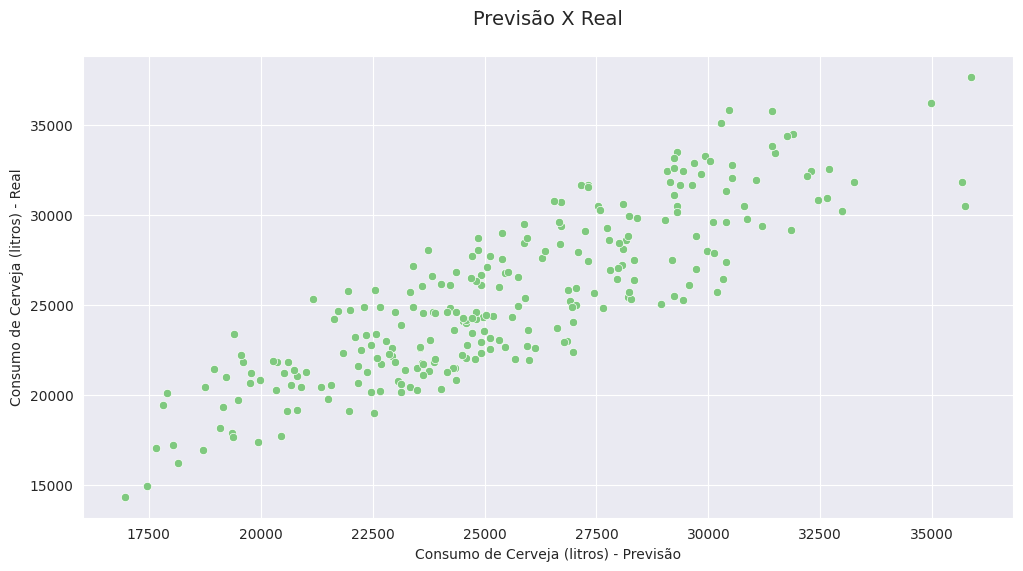

In [54]:
ax = sns.scatterplot(x=y_previsto_train, y = y_train)
ax.figure.set_size_inches(12,6)
ax.set_title('Previsão X Real', fontsize = 14, y = 1.05)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão',fontsize = 10)
ax.set_ylabel('Consumo de Cerveja (litros) - Real',fontsize = 10)
ax

## Obtendo os resíduos

In [55]:
residuo = y_train - y_previsto_train
residuo

195    3891.289113
344    4040.499863
288   -3010.078635
59    -1704.289133
220    4223.837237
          ...     
73     3186.229912
68     -739.805532
215    3010.236465
341    2588.394409
84     1631.868243
Name: consumo, Length: 255, dtype: float64

## Gráfico de dispersão entre valor estimado e resíduos

Método informal de verificação da hipótese de variância constante dos resíduos (homocedasticidade)

<Axes: title={'center': 'Previsão X Previsão'}, xlabel='Consumo de Cerveja (litros) - Previsão', ylabel='Resíduos'>

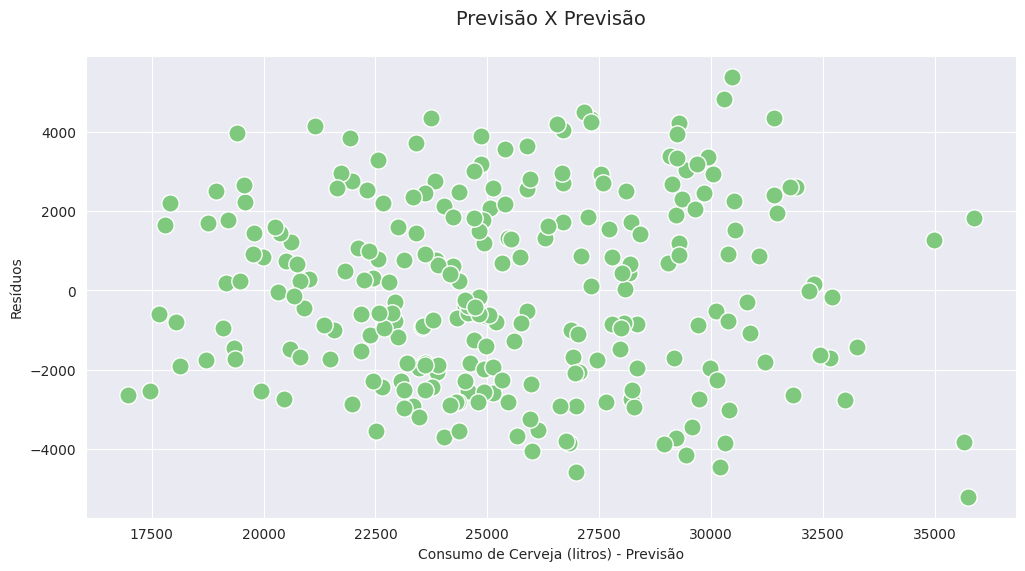

In [56]:
ax = sns.scatterplot(x=y_previsto_train, y = residuo, s = 156)
ax.figure.set_size_inches(12,6)
ax.set_title('Previsão X Previsão', fontsize = 14, y = 1.05)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão',fontsize = 10)
ax.set_ylabel('Resíduos',fontsize = 10)
ax

## Utilizando os resíduos ao quadrado

<img width='800px' src='../Dados/img/var_u.jpg'>
Fonte: Econometria Básica - 5ª edição - Gujarati e Porter

<Axes: title={'center': 'Previsão X Previsão'}, xlabel='Consumo de Cerveja (litros) - Previsão', ylabel='Resíduos'>

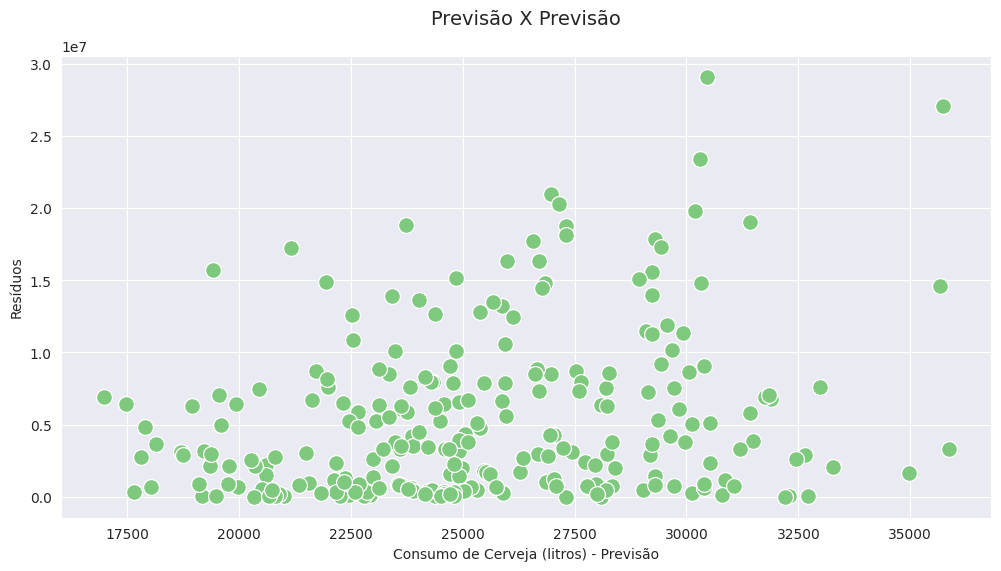

In [57]:
ax = sns.scatterplot(x=y_previsto_train, y = residuo **2, s = 130)
ax.figure.set_size_inches(12,6)
ax.set_title('Previsão X Previsão', fontsize = 14, y = 1.05)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão',fontsize = 10)
ax.set_ylabel('Resíduos',fontsize = 10)
ax

## Plotando a distribuição de frequências dos resíduos

<Axes: title={'center': 'Distribuição de Frequências dos Resíduos'}, xlabel='Litros', ylabel='Density'>

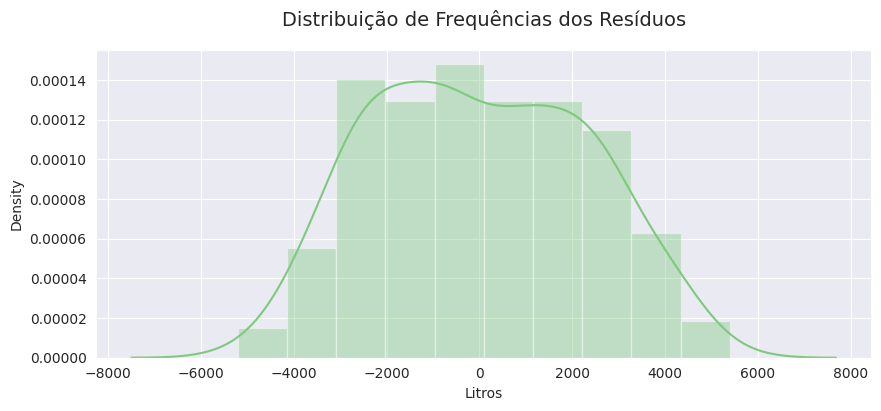

In [58]:
ax = sns.distplot(residuo, bins= 10)
ax.figure.set_size_inches(10,4)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize = 14, y = 1.05)
ax.set_xlabel('Litros',fontsize = 10)
ax

# <font color='red' style='font-size: 30px;'>Comparando Modelos</font>
<hr style='border: 2px solid red;'>

## Estimando um novo modelo com a substituição da variável explicativa Temperatura Máxima pela Temperatuda Média

In [63]:
X2 = df[['temp_media','chuva','fds']]
X2

,temp_media,chuva,fds
0,27.30,0.0,0
1,27.02,0.0,0
2,24.82,0.0,1
3,23.98,1.2,1
4,23.82,0.0,0
...,...,...,...
360,24.00,13.6,1
361,22.64,0.0,0
362,21.68,10.3,0
363,21.38,6.3,0


## Criando os datasets de treino e de teste

In [64]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y , test_size = 0.3, random_state = 2811)

## Instanciando a classe *LinearRegression()*

In [66]:
modelo_2 = LinearRegression()

## Utilizando o método *fit()* do objeto "modelo_2" para estimar nosso modelo linear utilizando os dados de TREINO (y2_train e X2_train)

In [67]:
modelo_2.fit(X2_train, y2_train)

LinearRegression()

## Obtendo o coeficiente de determinação (R²) do novo modelo estimado e comparando com o resultado do modelo anterior

In [77]:
print('Modelo com Temp. Máxima')
print(f'R² = {modelo.score(X_train,y_train) * 100:.2f}%')

Modelo com Temp. Máxima
R² = 73.36%


In [79]:
print('Modelo com Temp. Média')
print(f'R² = {modelo_2.score(X2_train,y2_train) * 100:.2f}%')

Modelo com Temp. Média
R² = 66.18%


## Gerando previsões para os dados de TESTE (X_test e X2_test) utilizando o método *predict()* dos objetos "modelo" e "modelo_2"

In [80]:
y_previsto = modelo.predict(X_test)
y_previsto_2 = modelo_2.predict(X2_test)

## Obtendo o coeficiente de determinação (R²) para as previsões dos dois modelos

In [81]:
print('Modelo com Temp. Média')
print(f'R² = {metrics.r2_score(y2_test, y_previsto_2) * 100:.2f}%')

Modelo com Temp. Média
R² = 65.75%


In [82]:
print('Modelo com Temp. Máxima')
print(f'R² = {metrics.r2_score(y_test, y_previsto) * 100:.2f}%')

Modelo com Temp. Máxima
R² = 69.07%


# <font color='red' style='font-size: 30px;'>Outras Métricas de Regressão</font>
<hr style='border: 2px solid red;'>

## Métricas da regressão
<hr>

fonte: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Algumas estatísticas obtidas do modelo de regressão são muito úteis como critério de comparação entre modelos estimados e de seleção do melhor modelo, as principais métricas de regressão que o scikit-learn disponibiliza para modelos lineares são as seguintes:

### Erro Quadrático Médio

Média dos quadrados dos erros. Ajustes melhores apresentam $EQM$ mais baixo.

$$EQM(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

### Raíz do Erro Quadrático Médio

Raíz quadrada da média dos quadrados dos erros. Ajustes melhores apresentam $\sqrt{EQM}$ mais baixo.

$$\sqrt{EQM(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$



## Obtendo métricas para o modelo com Temperatura Média

In [89]:
EQM_2 = metrics.mean_squared_error(y2_test, y_previsto_2).round(2)

#calculando a raíz
REQM_2 = np.sqrt(EQM_2).round(2)

R2_2 = metrics.r2_score(y2_test, y_previsto_2).round(2)

pd.DataFrame([EQM_2, REQM_2, R2_2], ['EQM','REQM', 'R²'], columns=['Métricas'])

,Métricas
EQM,6060775.46
REQM,2461.86
R²,0.66


## Obtendo métricas para o modelo com Temperatura Máxima

In [90]:
# Coeficiente de determinação
EQM = metrics.mean_squared_error(y_test, y_previsto).round(2)

# Erro quadrático médio
REQM = np.sqrt(EQM_2).round(2)

# Raiz do erro quadrático médio
R2 = metrics.r2_score(y_test, y_previsto).round(2)

pd.DataFrame([EQM, REQM, R2], ['EQM','REQM', 'R²'], columns=['Métricas'])

,Métricas
EQM,5471976.38
REQM,2461.86
R²,0.69


# <font color='red' style='font-size: 30px;'>Salvando e Carregando o Modelo Estimado</font>
<hr style='border: 2px solid red;'>

## Dados de entrada

In [92]:
X_test[0:1]

,temp_max,chuva,fds
5,30.5,12.2,0


In [93]:
entrada = X_test[0:1]

## Gerando previsão pontual

In [95]:
modelo.predict(entrada)[0]

26094.901775262017

## Criando um simulador simples

In [97]:
temp_max= 30.5
chuva = 12.2
fds = 0
entrada = [[temp_max,chuva,fds]]

print(f'{modelo.predict(entrada)[0]:.2f} litros.')

26094.90 litros.


## Salvando o modelo estimado

## pickle (https://docs.python.org/3/library/pickle.html)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O módulo <b>pickle</b> implementa protocolos binários para serializar e desserializar a estrutura de um objeto Python.</p>

In [98]:
import pickle

In [100]:
output = open('modelo_consumo_cerveja','wb')
pickle.dump(modelo, output)
output.close()

### Em um novo notebook/projeto Python

<h4 style='color: blue; font-weight: normal'>In [1]:</h4>

```sh
import pickle

modelo = open('modelo_consumo_cerveja','rb')
lm_new = pickle.load(modelo)
modelo.close()

temp_max = 30.5
chuva = 12.2
fds = 0
entrada = [[temp_max, chuva, fds]]
print('{0:.2f} litros'.format(lm_new.predict(entrada)[0]))
```

<h4 style='color: red; font-weight: normal'>Out [1]:</h4>

```
26094.90 litros
```